# Лабораторная работа №4. Линейные модели, SVM, деревья решений.

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

В данной работе нужно исследовать поведение линейных моделей, SVM, и дерева решений. Для сравнения с методом ближайших соседей используем тот же самый набор данных - [данные  о качестве красного вина](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). Сравним результаты этой лабораторной с предыдущей.

In [3]:
data = pd.read_csv('data/winequality-red.csv', sep=',')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Преобразуем целевой признак для задачи регрессии в признак для решения задачи классификации.
def regr_to_class(y: int) -> int:
    if y<6:
        result = 0
    else:
        result = 1        
    return result 

In [7]:
data['Q'] = \
data.apply(lambda row: regr_to_class(row['quality']),axis=1)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaller_1 = MinMaxScaler()
data['fixed acidity'] = scaller_1.fit_transform(data[['fixed acidity']])

In [11]:
scaller_2 = MinMaxScaler()
data['volatile acidity'] = scaller_2.fit_transform(data[['volatile acidity']])

In [12]:
scaller_3 = MinMaxScaler()
data['residual sugar'] = scaller_3.fit_transform(data[['residual sugar']])

In [13]:
scaller_4 = MinMaxScaler()
data['chlorides'] = scaller_4.fit_transform(data[['chlorides']])

In [14]:
scaller_5 = MinMaxScaler()
data['free sulfur dioxide'] = scaller_5.fit_transform(data[['free sulfur dioxide']])

In [15]:
scaller_6 = MinMaxScaler()
data['total sulfur dioxide'] = scaller_6.fit_transform(data[['total sulfur dioxide']])

In [16]:
scaller_7 = MinMaxScaler()
data['pH'] = scaller_7.fit_transform(data[['pH']])

In [17]:
scaller_8 = MinMaxScaler()
data['sulphates'] = scaller_8.fit_transform(data[['sulphates']])

In [18]:
scaller_9 = MinMaxScaler()
data['alcohol'] = scaller_9.fit_transform(data[['alcohol']])

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,5,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.9968,0.362205,0.209581,0.215385,5,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.9970,0.409449,0.191617,0.215385,5,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.9980,0.330709,0.149701,0.215385,6,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,5,0


In [20]:
data_clear = data.drop('quality', 1)

In [21]:
data_clear.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Q
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.9968,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.9970,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.9980,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,0


<AxesSubplot:>

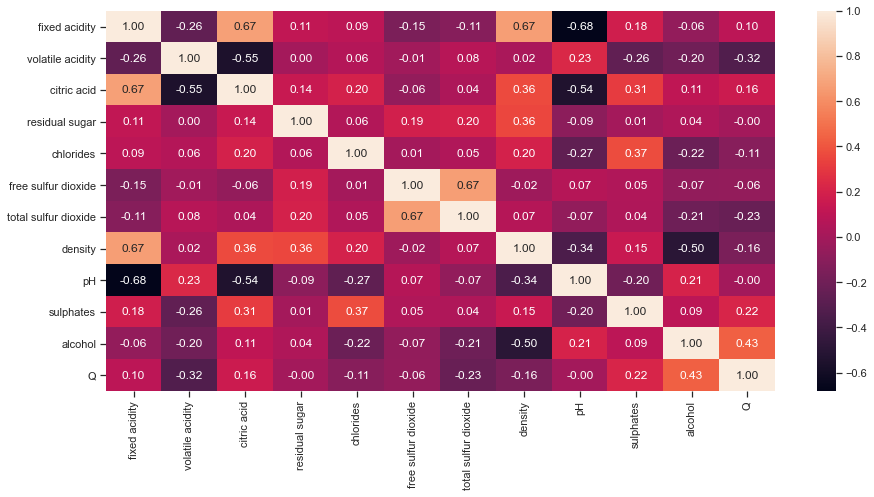

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data_clear.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [22]:
data_clear_copy = data_clear

In [23]:
data_clear_x = data_clear.drop('Q', 1)

In [24]:
data_clear_y = data_clear['Q']
data_clear_y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: Q, Length: 1599, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
vine_X_train, vine_X_test, vine_y_train, vine_y_test = train_test_split(data_clear_x, data_clear_y, test_size = 0.3, random_state = 1)

In [28]:
# Размер обучающей выборки
vine_X_train.shape, vine_y_train.shape

((1119, 11), (1119,))

In [29]:
# Размер тестовой выборки
vine_X_test.shape, vine_y_test.shape

((480, 11), (480,))

In [30]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [31]:
# В обучающей выборке
print_class_proportions(vine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 514 	 	 45.93%
1 	 605 	 	 54.07%


In [32]:
# В тестовой выборке
print_class_proportions(vine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 230 	 	 47.92%
1 	 250 	 	 52.08%


## 1) Линейная модель. Логистическая регрессия

Выполним подбор гиперпараметров для модели

In [34]:
from scipy.stats import uniform

In [33]:
model_logistic_for_selection = LogisticRegression(max_iter=200, solver='liblinear', random_state=1)

In [35]:
distributions = dict(C = uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

In [37]:
logistic_selection = RandomizedSearchCV(model_logistic_for_selection, distributions, random_state=1)

In [39]:
logistic_selection_result = logistic_selection.fit(data_clear_x, data_clear_y)

In [40]:
logistic_selection_result.best_params_

{'C': 1.209330290527359, 'penalty': 'l1'}

In [42]:
# Оптимальная модель
logistic_selection_result.best_estimator_

LogisticRegression(C=1.209330290527359, max_iter=200, penalty='l1',
                   random_state=1, solver='liblinear')

In [43]:
model_logistic_optimal = logistic_selection_result.best_estimator_

In [46]:
# Обучим эту модель на обучающей выборке
model_logistic_optimal.fit(vine_X_train,vine_y_train)

LogisticRegression(C=1.209330290527359, max_iter=200, penalty='l1',
                   random_state=1, solver='liblinear')

In [49]:
# Предскажем поведение на тестовой выборке
pred_test_from_logistic_optimal = model_logistic_optimal.predict(vine_X_test)
pred_test_from_logistic_optimal

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [51]:
from sklearn.metrics import plot_confusion_matrix

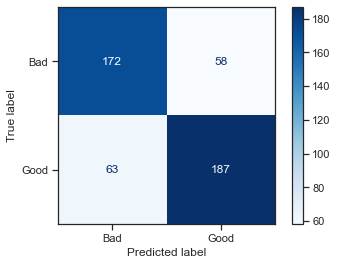

In [52]:
plot_confusion_matrix(model_logistic_optimal, vine_X_test, vine_y_test, 
                      display_labels=['Bad', 'Good'], cmap=plt.cm.Blues)

In [53]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [54]:
print_accuracy_score_for_classes(vine_y_test, pred_test_from_logistic_optimal)

Метка 	 Accuracy
0 	 0.7478260869565218
1 	 0.748


In [55]:
from sklearn.metrics import plot_roc_curve

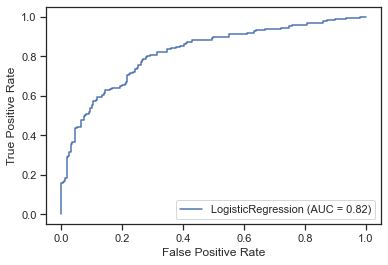

In [56]:
plot_roc_curve(model_logistic_optimal, vine_X_test, vine_y_test)

In [57]:
def get_metrics(model, X_test, y_test, predicted):
    plot_confusion_matrix(model, X_test, y_test, 
                      display_labels=['Bad', 'Good'], cmap=plt.cm.Blues)
    print_accuracy_score_for_classes(y_test, predicted)
    plot_roc_curve(model, X_test, y_test)

Метка 	 Accuracy
0 	 0.7478260869565218
1 	 0.748


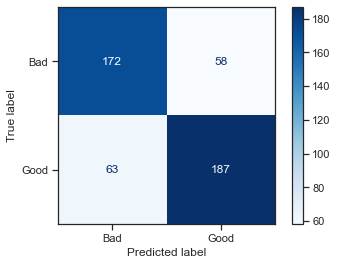

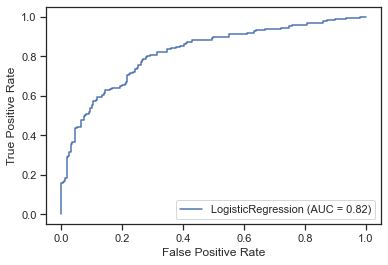

In [58]:
get_metrics(model_logistic_optimal, vine_X_test, vine_y_test, pred_test_from_logistic_optimal)

## 2) Метод опорных векторов. SVM

In [62]:
model_svm_for_selection = SVC(max_iter=1000, random_state=2)

In [71]:
distributions2 = dict(C = uniform(loc = 0, scale = 4),
                      kernel = ['linear', 'rbf', 'poly'],
                      degree = [3, 4, 5, 6],
                      gamma = uniform(loc = 0, scale = 1))

In [72]:
svm_selection = RandomizedSearchCV(model_svm_for_selection, distributions2, random_state=2)

In [75]:
# тест
svm_selection_2 = RandomizedSearchCV(model_svm_for_selection, distributions2, random_state=2, cv=4, scoring='accuracy')

In [73]:
svm_selection_result = svm_selection.fit(data_clear_x, data_clear_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

In [76]:
svm_selection_result_2 = svm_selection_2.fit(data_clear_x,data_clear_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

In [77]:
svm_selection_result.best_params_

{'C': 1.743979608568015,
 'degree': 4,
 'gamma': 0.9315408658211117,
 'kernel': 'poly'}

In [78]:
svm_selection_result_2.best_params_

{'C': 1.743979608568015,
 'degree': 4,
 'gamma': 0.9315408658211117,
 'kernel': 'poly'}

In [79]:
model_svm_optimal = svm_selection_result.best_estimator_

In [81]:
# Оптимальная модель
model_svm_optimal

SVC(C=1.743979608568015, degree=4, gamma=0.9315408658211117, kernel='poly',
    max_iter=1000, random_state=2)

In [82]:
# Обучим оптимальную модель на обучающей выборке
model_svm_optimal.fit(vine_X_train, vine_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=1.743979608568015, degree=4, gamma=0.9315408658211117, kernel='poly',
    max_iter=1000, random_state=2)

In [88]:
# Предскажем поведение модели на тестовой выборке
pred_test_from_svm_optimal = model_svm_optimal.predict(vine_X_test)

In [89]:
pred_test_from_svm_optimal

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

Метка 	 Accuracy
0 	 0.7608695652173914
1 	 0.752


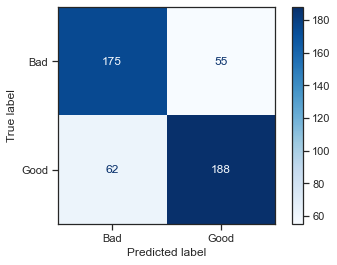

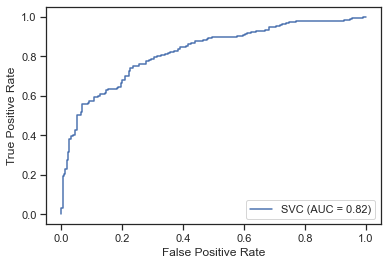

In [90]:
# Метрики 
get_metrics(model_svm_optimal, vine_X_test, vine_y_test, pred_test_from_svm_optimal)

## 3) Деревья решений

In [96]:
from IPython.display import Image
import graphviz 
import pydotplus
from io import StringIO 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [165]:
model_tree = DecisionTreeClassifier(random_state=1)
model_tree.fit(vine_X_train, vine_y_train)
model_tree

DecisionTreeClassifier(random_state=1)

In [166]:
pred_test_from_tree = model_tree.predict(vine_X_test)

In [167]:
pred_test_from_tree

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,

Метка 	 Accuracy
0 	 0.7347826086956522
1 	 0.776


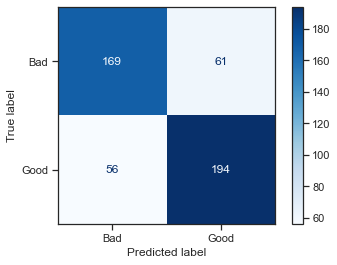

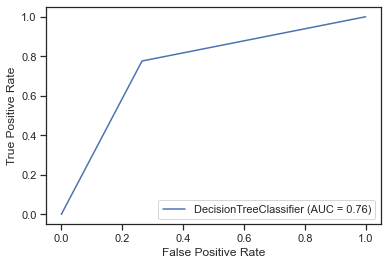

In [168]:
get_metrics(model_tree, vine_X_test, vine_y_test, pred_test_from_tree)

In [157]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [159]:
%%time
tree_selection = RandomizedSearchCV(DecisionTreeClassifier(random_state=2),
                    params, cv=3, scoring='accuracy')
tree_selection.fit(data_clear_x, data_clear_y)

Wall time: 172 ms


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2),
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.2, 0.4, 0.6, 0.8],
                                        'min_samples_leaf': [0.04, 0.06, 0.08]},
                   scoring='accuracy')

In [160]:
tree_selection.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.6, min_samples_leaf=0.04,
                       random_state=2)

In [161]:
model_tree_optimal = tree_selection.best_estimator_

In [162]:
model_tree_optimal.fit(vine_X_train, vine_y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.6, min_samples_leaf=0.04,
                       random_state=2)

In [163]:
pred_test_from_tree_optimal = model_tree_optimal.predict(vine_X_test)

Метка 	 Accuracy
0 	 0.7478260869565218
1 	 0.68


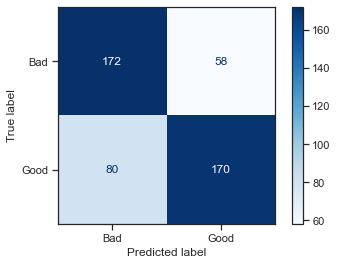

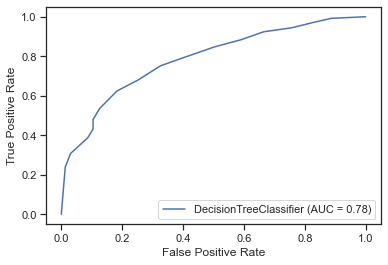

In [164]:
get_metrics(model_tree_optimal, vine_X_test, vine_y_test, pred_test_from_tree_optimal)

In [175]:
data_clear_y.unique()


array([0, 1], dtype=int64)

In [189]:
#import os
#os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'

dot_data = export_graphviz(model_tree_optimal, out_file=None, 
                           feature_names=data_clear_x.columns, 
                           class_names=str(data_clear_y.unique()), 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [190]:
list(zip(data_clear_x.columns.values, model_tree_optimal.feature_importances_))

[('fixed acidity', 0.0),
 ('volatile acidity', 0.07967156694054457),
 ('citric acid', 0.0),
 ('residual sugar', 0.019293050737820547),
 ('chlorides', 0.022711505933238417),
 ('free sulfur dioxide', 0.0),
 ('total sulfur dioxide', 0.12149891865027894),
 ('density', 0.07134681151590538),
 ('pH', 0.0),
 ('sulphates', 0.32920599416209384),
 ('alcohol', 0.35627215206011836)]

In [191]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

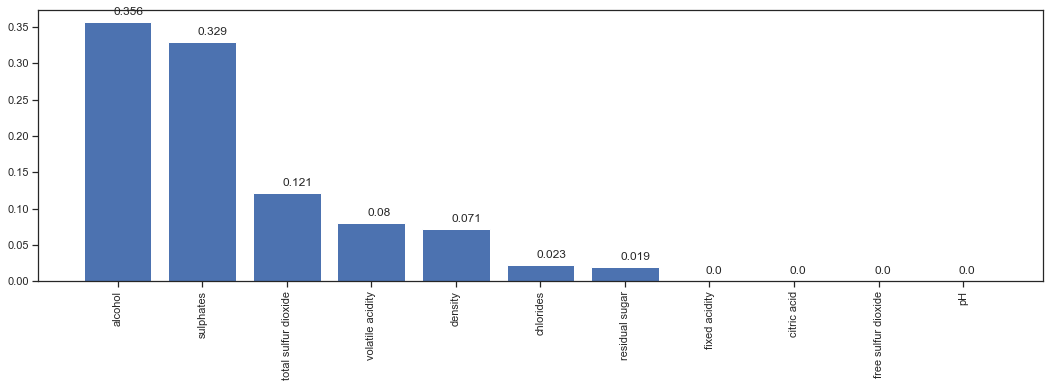

In [193]:
# Важность признаков
model_tree_optimal_fl, model_tree_optimal_fd = draw_feature_importances(model_tree_optimal, data_clear_x)